<a href="https://colab.research.google.com/github/oreomcflurryyy/statistical-learning-survival/blob/main/survival_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install lifelines
!pip install ISLP

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 7.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=5c0e4c8913a3849f18f2a8031b12f2217c22df44d2dd6e70ddd5c95782909443
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 29.7 MB/s eta 0:00:00
  Attempting 

In [2]:
from matplotlib.pyplot import subplots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ISLP.models import ModelSpec as MS
from ISLP import load_data

In [3]:
from lifelines import \
     (KaplanMeierFitter,
      CoxPHFitter)
from lifelines.statistics import \
     (logrank_test,
      multivariate_logrank_test)
from ISLP.survival import sim_time

| Observation (Y) | Censoring Indicator (δ) | Covariate (X) |
|-----------------|-------------------------|---------------|
| 26.5            | 1                       | 0.1           |
| 37.2            | 1                       | 11            |
| 57.3            | 1                       | -0.3          |
| 90.8            | 0                       | 2.8           |
| 20.2            | 0                       | 1.8           |
| 89.8            | 0                       | 0.4           |

This exercise makes use of the data in table above.

#####(a) Create two groups of observations. In Group 1, X < 2, whereas in Group 2, X ≥ 2. Plot the Kaplan-Meier survival curves corresponding to the two groups. Be sure to label the curves so that it is clear which curve corresponds to which group. By eye, does there appear to be a difference between the two groups’ survival curves?

In [6]:
data = {
    'Observation (Y)': [26.5, 37.2, 57.3, 90.8, 20.2, 89.8],
    'Censoring Indicator (δ)': [1, 1, 1, 0, 0, 0],
    'Covariate (X)': [0.1, 11, -0.3, 2.8, 1.8, 0.4]
}
df = pd.DataFrame(data)

In [7]:
group1 = df[df['Covariate (X)'] < 2]
group2 = df[df['Covariate (X)'] >= 2]
print("Group 1: X < 2")
print(group1)
print("\nGroup 2: X >= 2")
print(group2)

Group 1: X < 2
   Observation (Y)  Censoring Indicator (δ)  Covariate (X)
0             26.5                        1            0.1
2             57.3                        1           -0.3
4             20.2                        0            1.8
5             89.8                        0            0.4

Group 2: X >= 2
   Observation (Y)  Censoring Indicator (δ)  Covariate (X)
1             37.2                        1           11.0
3             90.8                        0            2.8


<Axes: xlabel='timeline'>

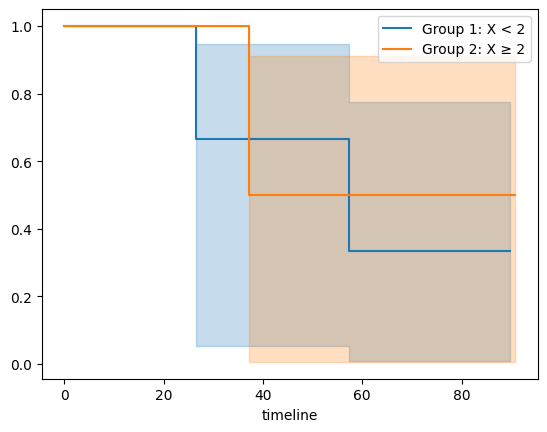

In [14]:
km = KaplanMeierFitter()
km.fit(durations=group1['Observation (Y)'],
        event_observed=group1['Censoring Indicator (δ)'],
        label='Group 1: X < 2')
ax = km.plot(ci_show=True)

km.fit(durations=group2['Observation (Y)'],
        event_observed=group2['Censoring Indicator (δ)'],
        label='Group 2: X ≥ 2')
km.plot(ax=ax, ci_show=True)

- Group 1 shows a steeper decline early on compared to Group 2, this might suggest poorer survival for Group 1.
- Group 2 maintains higher survival probabilities at later times, this could indicate better survival outcomes.
- Overlapping confidence intervals suggest that differences might not be statistically significant.

#####(b) Fit Cox’s proportional hazards model, using the group indicator as a covariate. What is the estimated coefficient? Write a sentence providing the interpretation of this coefficient, in terms of the hazard or the instantaneous probability of the event. Is there evidence that the true coefficient value is non-zero?

In [17]:
coxph = CoxPHFitter
model_df = pd.DataFrame(data)
model_df = MS(['Observation (Y)', 'Censoring Indicator (δ)', 'Covariate (X)'],
              intercept=False).fit_transform(model_df)
cox_fit = coxph().fit(model_df,
                      'Observation (Y)',
                      'Censoring Indicator (δ)')
cox_fit.summary[['coef', 'se(coef)', 'p']]

,coef,se(coef),p
covariate,,,
Covariate (X),0.076978,0.139696,0.581607


- The estimated coefficient for **Covariate (X)** is **0.076978**.

- In the context of the **Cox Proportional Hazards Model**, the coefficient represents the log hazard ratio associated with a one-unit increase in the covariate \( X \). To interpret this in terms of the **hazard (instantaneous risk)**, we exponentiate the coefficient:

$$
\text{Hazard Ratio (HR)} = e^{\text{coef}} = e^{0.076978} \approx 1.08
$$
  
> For each **one-unit increase** in **Covariate (X)**, the hazard of experiencing the death **increases by approximately 8%**. This means that higher values of \( X \) are associated with a higher instantaneous risk of the event occurring.

- The p-value associated with the estimated coefficient is **0.581607**. Since **0.581607** is **much greater** than the common significance level of **0.05**, we **fail to reject the null hypothesis**. In other words, based on this analysis, we **cannot conclude** that \( X \) has a meaningful impact on the hazard of the event occurring.

#####(c) Recall that in the case of a single binary covariate, the log-rank test statistic should be identical to the score statistic for the Cox model. Conduct a log-rank test to determine whether there is a difference between the survival curves for the two groups. How does the p-value for the log-rank test statistic compare to the p-value for the score statistic for the Cox model from (b)?

In [18]:
cox_fit.log_likelihood_ratio_test()

<lifelines.StatisticalResult: log-likelihood ratio test>
null_distribution = chi squared
  degrees_freedom = 1
        test_name = log-likelihood ratio test

---
 test_statistic    p  -log2(p)
           0.29 0.59      0.75

In [22]:
logrank_test(group1['Observation (Y)'],
             group2['Observation (Y)'],
             group1['Censoring Indicator (δ)'],
             group2['Censoring Indicator (δ)'])

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.08 0.78      0.35

- Both p-values are greater than 0.05, indicating no statistically significant difference between the survival curves of the two groups.
- This aligns with the Cox Model's finding that the covariate
X is not a significant predictor of the hazard.